<a href="https://colab.research.google.com/github/nrzsdy1993/Deeplearning_Basic/blob/main/20211101_face_detector_with_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/yebiny/Face-detection-for-DSM.git

fatal: destination path 'Face-detection-for-DSM' already exists and is not an empty directory.


In [2]:
import cv2, sys
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [21]:
def detect_flow(imgPath, modelDir):
    
    # read image
    img = cv2.imread(imgPath)
    (img_h, img_w) = img.shape[:2]
    print("* org img shape:", imgPath,  img.shape)
    
    # use model
    facenet = cv2.dnn.readNet(modelDir+"/deploy.prototxt",
                              modelDir+"/res10_300x300_ssd_iter_140000.caffemodel")
    
    blob = cv2.dnn.blobFromImage( img, 
                                  1.0, (300, 300),
    	                          (104.0, 177.0, 123.0))
    facenet.setInput(blob)
    detections = facenet.forward()
    print("* dections results:", detections.shape)
   
    # get results from detections
    faces=[]
    for i in range(detections.shape[2]):
      conf = detections[0,0,i,2]
      if conf <0.5:
        continue
      x1 = int(detections[0,0,i,3]*img_w)
      y1 = int(detections[0,0,i,4]*img_h)
      x2 = int(detections[0,0,i,5]*img_w)
      y2 = int(detections[0,0,i,6]*img_h)
      cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
    
      #얼굴만 크롭하기
     
      faces.append([x1,y1,x2,y2])
    
    # visualize
    cv2_imshow(img)
    return faces

* org img shape: Face-detection-for-DSM/imgs/02.jpg (306, 500, 3)
* dections results: (1, 1, 200, 7)


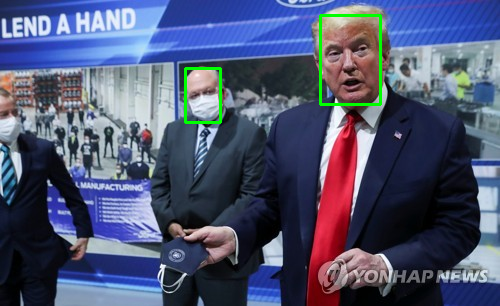

In [39]:
imgPath = 'Face-detection-for-DSM/imgs/02.jpg'
modelDir = 'Face-detection-for-DSM/models'
faces_ax = detect_flow(imgPath,modelDir)

In [6]:
img = cv2.imread(imgPath)
faces=[]
for x1, y1, x2, y2 in faces_ax:
  face= img[y1:y2,x1:x2]
  faces.append(face)

(89, 60, 3)
(54, 35, 3)


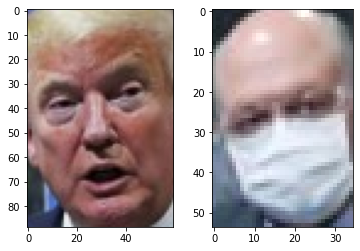

In [7]:

for i, face in enumerate(faces):
  print(face.shape)
  plt.subplot(1,len(faces),i+1)
  plt.imshow(cv2.cvtColor(face,cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
from tensorflow.keras import applications, utils, layers, models, optimizers
faces_pre = []
for face in faces:
  face=cv2.resize(face, (224, 224))
  face = applications.mobilenet_v2.preprocess_input(face)
#여러명일때
  faces_pre.append(face)
  print(face.shape)


(224, 224, 3)
(224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)
(224, 224, 3)


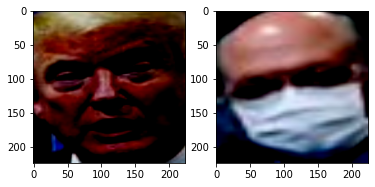

In [9]:
for i, face in enumerate(faces_pre):
  print(face.shape)
  plt.subplot(1,len(faces),i+1)
  plt.imshow(cv2.cvtColor(face,cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
from tensorflow.keras import models

In [11]:
model_cfy=models.load_model('Face-detection-for-DSM/models/mask_model.h5')
model_cfy.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [12]:
faces_pre=np.array(faces_pre)
faces_pre.shape

(2, 224, 224, 3)

In [13]:
results=model_cfy.predict(faces_pre)

In [14]:
results

array([[9.7579177e-05, 9.9990237e-01],
       [9.9912912e-01, 8.7085721e-04]], dtype=float32)

In [24]:
x1

185

# visualize

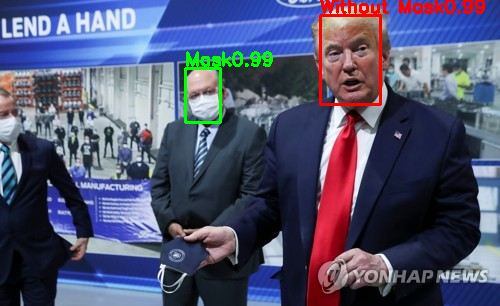

In [41]:
img =cv2.imread(imgPath)

for i, ax in enumerate(faces_ax):
  res_1 = results[i]

  p_mask = res_1[0]
  p_without_mask = res_1[1]

  if p_mask > p_without_mask:
    color = (0,255,0)
    label = "Mask" + str(p_mask)[:4]
  else:
    color = (0, 0, 255)
    label = "Without Mask" + str(p_without_mask)[:4]
  cv2.putText(img, label, (ax[0], ax[1]-3),cv2.FONT_HERSHEY_SIMPLEX,0.6,color,2)
  cv2.rectangle(img, (ax[0], ax[1]), (ax[2], ax[3]), color, 2)

cv2_imshow(img)


In [16]:
faces_ax

[[320, 15, 380, 104], [185, 68, 220, 122]]